Phase 1 

In [3]:
'''Task 1 -
Write a function normal_pdf(mean, std, x) that returns the pdf value.
Find pdf at x = 5 for mean = 5 and std = 1.
'''
import math

def normal_pdf(mean, std, x):
    # 1. Calculate the first part: 1 / (sqrt(2 * pi) * std)
    part1 = 1 / (math.sqrt(2 * math.pi) * std)
    
    # 2. Calculate the power/exponent part: -(x - mean)^2 / (2 * std^2)
    exponent = - ((x - mean) ** 2) / (2 * (std ** 2))
    
    # 3. Combine using e^(exponent)
    pdf_value = part1 * math.exp(exponent)
    
    return pdf_value


result = normal_pdf(5, 1, 5)
print("PDF value at x=5:", result)


PDF value at x=5: 0.3989422804014327


In [8]:
'''Task 2 -
Create a function z_score(x, mean, std).
Calculate the z-score of x = 20 when mean = 15 and std = 2'''

def z_score(x, mean, std):
    # Apply the formula (x - mean) / std
    z = (x - mean) / std
    return z

# Example
result = z_score(20, 15, 2)
print("Z-score:", result)

Z-score: 2.5


In [11]:
'''Task 3 -
Write a simple binomial_prob(n, k, p) function.
Find the probability of 2 successes out of 5 trials when p = 0.5'''

# factorial
def factorial(num):
    result = 1
    for i in range(1, num + 1):
        result *= i
    return result

def binomial_prob(n, k, p):
    # Calculate combination nCk using our own factorial function
    nCk = factorial(n) / (factorial(k) * factorial(n - k))
    
    # Apply binomial formula
    prob = nCk * (p ** k) * ((1 - p) ** (n - k))
    
    return prob

# Example: 2 successes out of 5 trials, p = 0.5
result = binomial_prob(5, 2, 0.5)
print("Probability:", result)


Probability: 0.3125


In [12]:
'''Task 4 -
Write a function poisson_prob(lmbda, k).
Find P(X = 0) for lambda = 3.''''

# factorial 
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def poisson_prob(lmbda, k):
    e = 2.718281828   # value of e (no math module)
    
    # Apply formula: (e^-lambda * lambda^k) / k!
    prob = (e ** (-lmbda)) * (lmbda ** k) / factorial(k)
    
    return prob

# Example: P(X = 0) when lambda = 3
result = poisson_prob(3, 0)
print("Probability:", result)


Probability: 0.049787068393087074


Phase 2

In [1]:
'''Task 1 -
Generate 3000 values from a normal distribution (mean = 40, std = 6).
Compute the sample mean and compare it with the true mean.'''
import random

# Generate 3000 values from Normal(mean=40, std=6)
data = []
for i in range(3000):
    value = random.normalvariate(40, 6)  # normal distribution
    data.append(value)

# Compute sample mean
sample_mean = sum(data) / len(data)

print("Sample Mean:", sample_mean)
print("True Mean: 40")

Sample Mean: 39.867471800818855
True Mean: 40


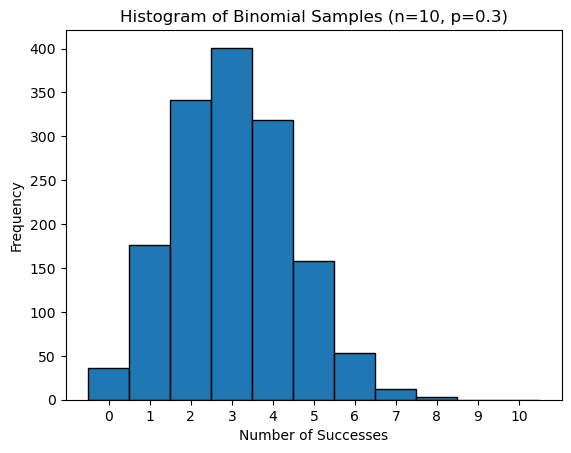

In [22]:
'''Task 2:
simulate 1500 samples from a binomial distribution (n = 10, p = 0.3).
Plot a histogram and explain the observed shap'''
import random
import matplotlib.pyplot as plt

# Step 1: Generate 1500 binomial samples
samples = []
for _ in range(1500):
    successes = 0
    for i in range(10):           # n = 10 trials
        if random.random() < 0.3: # p = 0.3 success probability
            successes += 1
    samples.append(successes)
# Step 2: Plot histogram
plt.hist(samples, bins=range(0, 12), edgecolor='black', align='left')
plt.title('Histogram of Binomial Samples (n=10, p=0.3)')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))
plt.show()


In [ ]:
'''Task 3 -
Simulate 2000 events using a Poisson distribution with lambda = 5.
Find the most common outcome (mode).
Explain why it is close to lambda.'''

'''Why the mode is close to λ:

In a Poisson distribution, the mean and variance are both λ.
Most values cluster around λ, so the most likely (mode) value is often λ or very close.
That’s why if λ = 5, the mode is usually 5 or 4'''

import random
import math

# Function to generate one Poisson random number using formula
def poisson_random(lmbda):
    L = math.exp(-lmbda)   # e^-lambda
    k = 0
    p = 1.0

    while p > L:
        k += 1
        p *= random.random()

    return k - 1  # subtract 1 because loop runs one extra time

lmbda = 5
events = []

# Step 1: Simulate 2000 Poisson events
for _ in range(2000):
    events.append(poisson_random(lmbda))

# Step 2: Find the most common outcome (mode)
mode_value = max(set(events), key=events.count)

print("Most common number (mode):", mode_value)


In [23]:
'''Task 4 -
Given dataset [10, 12, 15, 18, 25, 30], compute the z-score of 30.
Interpret what a high z-score means.'''

'''A high z-score means the value is far above the mean.'''
# Dataset
data = [10, 12, 15, 18, 25, 30]
x = 30

# Step 1: Compute mean
mean = sum(data) / len(data)

# Step 2: Compute standard deviation 
variance = sum((i - mean) ** 2 for i in data) / len(data)
std = variance ** 0.5

# Step 3: Compute z-score
z = (x - mean) / std

print("Mean:", mean)
print("Standard Deviation:", std)
print("Z-score of", x, ":", z)


Mean: 18.333333333333332
Standard Deviation: 7.086763875156433
Z-score of 30 : 1.6462615196712953


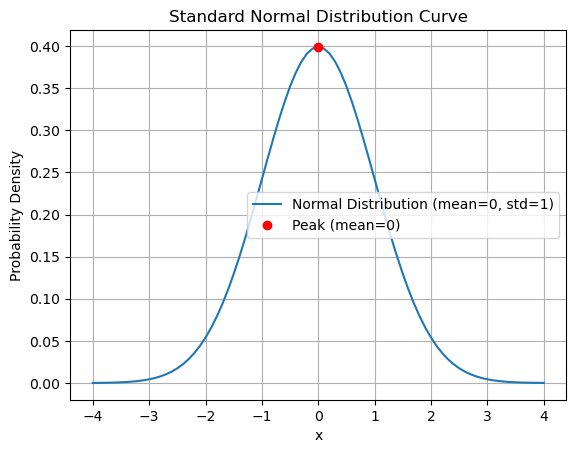

In [26]:
'''Task 5 -
Plot a normal distribution curve for x = -4 to 4 using normal_pdf(mean=0, std=1).
Mark the point where the curve peaks.'''
import matplotlib.pyplot as plt
import math

# Step 1: Define normal PDF function
def normal_pdf(mean, std, x):
    return (1 / (std * math.sqrt(2 * math.pi))) * math.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Step 2: Create x values from -4 to 4
x_values = [i * 0.1 for i in range(-40, 41)]  # -4, -3.9, ..., 3.9, 4

# Step 3: Compute y values using normal_pdf
y_values = [normal_pdf(0, 1, x) for x in x_values]

# Step 4: Plot the normal distribution curve
plt.plot(x_values, y_values, label='Normal Distribution (mean=0, std=1)')

# Step 5: Mark the peak (x = mean = 0)
peak_y = normal_pdf(0, 1, 0)
plt.plot(0, peak_y, 'ro', label='Peak (mean=0)')

# Step 6: Add labels and title
plt.title('Standard Normal Distribution Curve')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
